In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [13]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Really terrible user experi...
1,✅ Trip Verified | Very impressed with BA. Chec...
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,Not Verified | I flew from Malaga via LHR to...
4,✅ Trip Verified | Milan to Miami return via L...


In [14]:
df

,reviews
0,✅ Trip Verified | Really terrible user experi...
1,✅ Trip Verified | Very impressed with BA. Chec...
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,Not Verified | I flew from Malaga via LHR to...
4,✅ Trip Verified | Milan to Miami return via L...
...,...
995,✅ Trip Verified | London to Shanghai. The mos...
996,✅ Trip Verified | Their customer service is ho...
997,"✅ Trip Verified | London City to Zurich, I fl..."
998,✅ Trip Verified | I booked a flight from Buch...


In [15]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [16]:
df

,reviews
0,Really terrible user experience. British Air...
1,Very impressed with BA. Check in online was a...
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor..."
3,I flew from Malaga via LHR to Boston on the...
4,Milan to Miami return via London. Worst busi...
...,...
995,London to Shanghai. The most disappointing b...
996,Their customer service is horrible. Lost our ...
997,"London City to Zurich, I fly this route a lo..."
998,I booked a flight from Bucharest to London a...


In [17]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Really terrible user experience. British Air...,Really terrible user experience British Airwa...
1,Very impressed with BA. Check in online was a...,Very impressed with BA Check in online was a ...
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...
3,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...
4,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...


In [18]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chandrabhushan.yadav\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chandrabhushan.yadav\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chandrabhushan.yadav\AppData\Roaming\nltk_dat
[nltk_data]     a...


In [19]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chandrabhushan.yadav\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chandrabhushan.yadav\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Really terrible user experience. British Air...,Really terrible user experience British Airwa...,"[(Really, r), (terrible, a), (user, a), (exper..."
1,Very impressed with BA. Check in online was a...,Very impressed with BA Check in online was a ...,"[(impressed, a), (BA, n), (Check, n), (online,..."
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu..."
3,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)..."
4,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No..."


In [20]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Really terrible user experience. British Air...,Really terrible user experience British Airwa...,"[(Really, r), (terrible, a), (user, a), (exper...",Really terrible user experience British Airw...
1,Very impressed with BA. Check in online was a...,Very impressed with BA Check in online was a ...,"[(impressed, a), (BA, n), (Check, n), (online,...",impressed BA Check online little convoluted ...
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...
3,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...
4,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...


In [21]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Really terrible user experience. British Air...,Really terrible user experience British Airw...
1,Very impressed with BA. Check in online was a...,impressed BA Check online little convoluted ...
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August Club World shame Brit...
3,I flew from Malaga via LHR to Boston on the...,fly Malaga via LHR Boston th May arrival Bos...
4,Milan to Miami return via London. Worst busi...,Milan Miami return via London Worst business...
...,...,...
995,London to Shanghai. The most disappointing b...,London Shanghai disappointing business class...
996,Their customer service is horrible. Lost our ...,customer service horrible Lost bag sit Londo...
997,"London City to Zurich, I fly this route a lo...",London City Zurich fly route lot around time...
998,I booked a flight from Bucharest to London a...,book flight Bucharest London return airport ...


In [22]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 217.9 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 330.3 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Really terrible user experience. British Air...,Really terrible user experience British Airwa...,"[(Really, r), (terrible, a), (user, a), (exper...",Really terrible user experience British Airw...,-0.5907,Negative
1,Very impressed with BA. Check in online was a...,Very impressed with BA Check in online was a ...,"[(impressed, a), (BA, n), (Check, n), (online,...",impressed BA Check online little convoluted ...,0.9888,Positive
2,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...,0.9545,Positive
3,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative
4,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative


In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    475
Negative    417
Neutral     108
Name: count, dtype: int64

In [ ]:
#Visual Representation

([<matplotlib.patches.Wedge at 0x1d8e190a8d0>,
 [Text(0.08630502583501973, 1.096609065490349, 'Positive'),
  Text(-0.44635778463918296, -1.0053679565671472, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.04707546863728348, 0.5981503993583721, '47.5%'),
  Text(-0.24346788253046342, -0.5483825217638983, '41.7%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

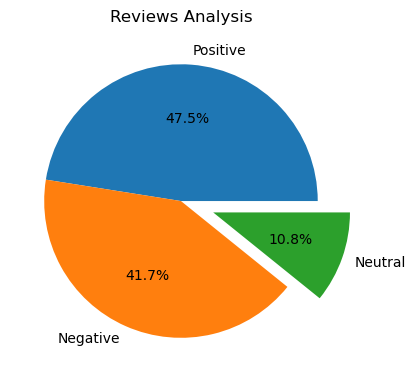

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [26]:
df.to_csv("BA_reviews.csv")

In [28]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 393.8 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

ModuleNotFoundError: No module named 'wordcloud'